<a href="https://colab.research.google.com/github/felipemanfrin/NLP/blob/master/Dadosdesbalanceados_ipnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento da base de dados


In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
dataset = pd.read_csv('credit_data.csv')

In [ ]:
dataset.shape

(2000, 5)

In [ ]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


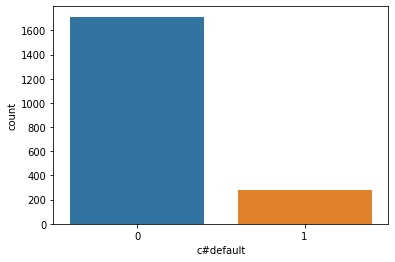

In [4]:
import seaborn as sns
sns.countplot(dataset['c#default']);

In [5]:
X = dataset.iloc[:, 1:4].values

In [ ]:
X.shape

(1997, 3)

In [ ]:
X


array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [6]:
y = dataset.iloc[:, 4].values

In [ ]:
y.shape

(1997,)

# Base de treinamento e teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_treino, X_teste, y_treino, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
X_treino.shape, y_treino.shape

((1597, 3), (1597,))

In [ ]:
X_teste.shape, y_test.shape

((400, 3), (400,))

In [9]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [ ]:
np.unique(y_treino, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [ ]:
226 / len(y_treino)

0.14151534126487164

# Classificação com Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
modelo = GaussianNB()
modelo.fit(X_treino, y_treino)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [14]:
from sklearn.metrics import confusion_matrix

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(previsoes, y_test)

0.9175

In [18]:
cm = confusion_matrix(previsoes, y_test)
cm

array([[339,  29],
       [  4,  28]])

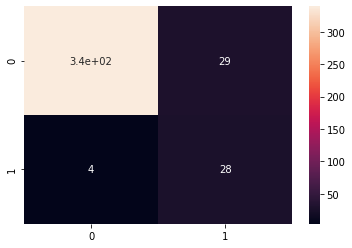

In [19]:
sns.heatmap(cm, annot=True)

# Undersampling e Oversampling


In [22]:
from imblearn.under_sampling import TomekLinks

In [24]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_under, y_under, id_under = tl.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [25]:
X_under.shape, y_under.shape, id_under

((1897, 3), (1897,), array([   0,    1,    2, ..., 1994, 1995, 1996]))

In [26]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [28]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [30]:
X_treinamento_under, X_teste_under, y_treinamento_under, y_teste_under = train_test_split(X_under, y_under, test_size=0.2, stratify= y_under)
X_treinamento_under.shape, X_teste_under.shape

((1517, 3), (380, 3))

In [32]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_under, y_treinamento_under)
previsoes_u = modelo_u.predict(X_teste_under)
accuracy_score(previsoes_u, y_teste_under)

0.9131578947368421

In [35]:
cm_u = confusion_matrix(previsoes_u, y_teste_under)
cm_u

array([[318,  28],
       [  5,  29]])

# oversampling(sobreamostragem)

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE(ratio='minority')
X_over, y_over = smote.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [38]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [39]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [40]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [43]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, test_size = 0.2, stratify=y_over)

In [44]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [45]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.9198250728862973

In [46]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[304,  16],
       [ 39, 327]])